# PREDICCIÓN DEL COMPORTAMIENTO AL CONDUCIR 

In [125]:
#Para la realización de esta actividad se importaron las siguientes librerias
import numpy as np
#libreria pandas para el dataset
from sklearn.metrics import accuracy_score
#librería para los gráficos
import matplotlib.pyplot as plt
import pandas as pd
#librería para la división de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#librería para el escalamiento  
from sklearn.preprocessing import StandardScaler
#librería para las métricas
#importar librería para gráficos
import seaborn as sns
#También
from sklearn import preprocessing
# Import label encoder
from sklearn.preprocessing import LabelEncoder


In [126]:
#Se realiza la carga del dataset
js = pd.read_csv("test_motion_data.csv")
#Mostrar el dataset
js.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924


In [127]:
encoder = LabelEncoder()

In [128]:

  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
js['Class']= label_encoder.fit_transform(js['Class'])
  
js['Class'].unique()

array([0, 1, 2])

In [129]:
js["Class"]= encoder.fit_transform(js["Class"])

In [131]:
js.head(100)

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,0,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,0,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,0,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,0,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,0,818924
...,...,...,...,...,...,...,...,...
95,0.990379,-1.199478,-0.499061,0.018937,0.238467,0.022449,0,818973
96,0.966390,-0.531351,-0.235044,-0.023824,0.013057,-0.008094,0,818974
97,1.663505,-3.251500,-1.394324,0.043982,0.172493,-0.003818,0,818974
98,-0.020574,-0.246340,0.042918,0.012217,0.008781,0.071929,0,818975


## SE REALIZA LA DESCRIPCIÓN DEL DATASET UTILIZADO 
El Dataset contiene datos los cuales seran usados para un aprendizaje profundo y el aprendizaje automático  con el proposito de predecir el comportamiento de conducción, según lo informado por la AAA Foundation for Traffic Safety , 106,727 accidentes fatales, el 55.7 por ciento del total, durante un período reciente de cuatro años involucraron a conductores que cometieron una o más acciones de conducción agresivas. Por tanto, aplicando los metodos de Naive bayes y hidden markov model se prentende responder lo siguiente ¿cómo predecir comportamientos de conducción peligrosos de forma rápida y precisa? <br>
Link del dataset usado: https://www.kaggle.com/datasets/outofskills/driving-behavior



# CARACTERIZACIÓN DEL DATASET
#Usano count se obtienen el numero de instancias del data set

In [113]:
#Muestra la información y el tipo de dato.
js.drop('Class', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3683 non-null   float64
 1   AccY       3683 non-null   float64
 2   AccZ       3683 non-null   float64
 3   GyroX      3683 non-null   float64
 4   GyroY      3683 non-null   float64
 5   GyroZ      3683 non-null   float64
 6   Timestamp  3683 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 201.5 KB



***variable objetivo***


--> Class -categorica (comportamiento al conducir-lento, normal, agresivo)

--> Aceleración (ejes X,Y,Z en metros por segundo al cuadrado (m/s2))
--> Giro (ejes X,Y,Z en metros por segundo al cuadrado (m/s2))


# Se realiza la limpieza de datos

In [92]:
#Se realiza la transformación de las caracteristicas(Variable objetivo y variables de entrada) 
y = js[['Class']]
X = js[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Timestamp']]

# Se realiza la busqueda de valores nulos

In [93]:
#Comprobación de valores nulos(datos de entrada) 
X.isnull().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Timestamp    0
dtype: int64

No existen valores nulos 

In [94]:
#Se realiza la comprobación de valores nulos(variable objetivo)
y.isnull().sum()

Class    0
dtype: int64

No exixten valores nulos en la variable objetivo .

# SE REALIZA LA BUSQUEDA DE VALORES DUPLICADOS

In [95]:
#Se realiza la comprobación de valores nulos en la variable objetivo
y.isnull().sum()

Class    0
dtype: int64

# SELECCION DE CARACTERÍSTICAS

# SE REMUEVEN LOS VALORES

In [96]:
#Dataset con las instancias de los atributos o caracteristicas seleciconas
variables_seleccionadas = ['GyroX','AccX','GyroY']
#Se remueven los valores 
for a in variables_seleccionadas: 
    q1 = js[a].quantile(0.25)
    q3 = js[a].quantile(0.75)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    js = js[(js[a] > 0) & (js[a] < upper)]

In [97]:
#Se imprime las características que tiene mayor correlación
X.dtypes

AccX         float64
AccY         float64
AccZ         float64
GyroX        float64
GyroY        float64
GyroZ        float64
Timestamp      int64
dtype: object

In [98]:
#Se procede a imprimir los valores unicos de la variable de salida
np.unique(y)

array([0, 1, 2])

# ESTANDARIZACIÓN

In [99]:
# Se importar el metodo de scalado standar
from sklearn.preprocessing import StandardScaler
from skfuzzy import control as ctrl
from fcmeans import FCM
# Se formar objeto de scala para entradas
VariablesEntradaScaler=StandardScaler()

In [100]:
 #Datos de entrada
VariablesEntradaFit=VariablesEntradaScaler.fit(X)

In [101]:
#Generación de los valores estandarizados de X e y
#Datos e entrada
X=VariablesEntradaFit.transform(X)

In [104]:
#Implemento el modelo fuzzy probabilistico con referencia a
modelo_fuzzy = FCM(n_clusters=4,init=1.7,random_state=0, fuzzifier=2) 
modelo_fuzzy.fit(X) 

# SE REALIZA LA DIVICION DEL SET EN DATOS DE ENTRANAMIENTO

In [55]:
#Libreria para la division del set de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [56]:
#Tamaño del set de entrenamiento
X_train.shape, X_test.shape

((2578, 7), (1105, 7))

In [57]:
#Tamaño del set de prueba
y_train.shape, y_test.shape

((2578, 1), (1105, 1))

# SE IMPLEMENTA EL MODELO DE NAIVE-BAYES

In [105]:
#Importo libreria para realizar el modelo de Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
#Permite obtener la precision recall f1
from sklearn.metrics import precision_recall_fscore_support as score
#Librería para generar un reporte con las  metricas del modelo
from sklearn.metrics import classification_report
#Modelo
ms = GaussianNB()
#Entreno el modelo y aplico en el set de prueba
y_pred = ms.fit(X_train, y_train).predict(X_test)

C:\Users\chave\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
#Se obtiene el Accuracy
acc_score_naive = accuracy_score(y_test, y_pred)
#Se imprime
print(acc_score_naive)

0.7285067873303167


In [108]:
#Matriz de confusión
se = confusion_matrix(y_test, y_pred)
print(se)

[[265   0   0]
 [113 163 186]
 [  0   1 377]]


In [109]:
#Se muestran las metricas (accuracy, precision, recall)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       265
           1       0.99      0.35      0.52       462
           2       0.67      1.00      0.80       378

    accuracy                           0.73      1105
   macro avg       0.79      0.78      0.72      1105
weighted avg       0.81      0.73      0.69      1105



In [62]:
#Precisión 
precision_naive,recall_naive,fscore_naive,support_naive=score(y_test,y_pred,average='macro')

# SE APLICA EL MODELO DE FUZZY PROBABILISTICO

In [63]:
#Instalacion de scikit-fuzzy 
import numpy as np
import skfuzzy as fuzz
#Importar la funcion control logica difusa para crear sistema de control
from skfuzzy import control as ctrl
from fcmeans import FCM

In [64]:
#Transformación de las caracteristicas 
# Variable objetivo y variables de entrada
y = js[['Class']]
X = js[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Timestamp']]

# ESTANDARIZACIÓN

In [65]:
# Se importar el metodo de scalado standar
from sklearn.preprocessing import StandardScaler
# Se formar objeto de scala para entradas
VariablesEntradaScaler=StandardScaler()

In [66]:
 #Datos de entrada
VariablesEntradaFit=VariablesEntradaScaler.fit(X)

In [67]:
#Generación de los valores estandarizados de X e y
#Datos e entrada
X=VariablesEntradaFit.transform(X)

In [68]:
#Implemento el modelo fuzzy probabilistico con referencia a
modelo_fuzzy = FCM(n_clusters=4,init=1.7,random_state=0, fuzzifier=2) 
modelo_fuzzy.fit(X) 

In [69]:
#Obtengo los centroides
centers = modelo_fuzzy.centers
y_pred_fuzzy = modelo_fuzzy.predict(X)
y_pred_fuzzy

array([1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1,

In [70]:
#Accuracy del modelo fuzzy
acc_score_fuzzy = accuracy_score(y, y_pred_fuzzy)
#Se imprimo el accuracy del modelo 
print(acc_score_fuzzy)

0.466824644549763


In [71]:
#Obtengo matriz de confusion 
cm_fuzzy = confusion_matrix(y, y_pred_fuzzy)
print(cm_fuzzy)

[[  0  39  50]
 [  0  97  85]
 [  0  51 100]]


In [72]:
#Libreria para graficar la matriz de confusión
import matplotlib as mpl
cmap = mpl.colormaps['viridis']


<AxesSubplot:>

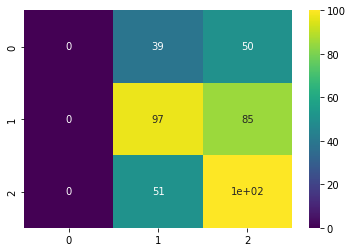

In [73]:
sns.heatmap(confusion_matrix(y, y_pred_fuzzy), annot=True,cmap="viridis")

In [74]:
#Se dan a conocer las metricas principales del fuzzy
print(classification_report(y, y_pred_fuzzy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.52      0.53      0.53       182
           2       0.43      0.66      0.52       151

    accuracy                           0.47       422
   macro avg       0.31      0.40      0.35       422
weighted avg       0.38      0.47      0.41       422



C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
#Se muestra la precision 
precision_fuzzy,recall_fuzzy,fscore_fuzzy,support_fuzzy=score(y,y_pred_fuzzy,average='macro')
precision_fuzzy

C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.314749497477908

# SE APLICA EL MODELO DE HIDDEN MARKOV MODEL

In [76]:
#Librería para implementar el modelo de Hidden Markov
from hmmlearn.hmm import GaussianHMM
js.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
7,0.043449,0.228911,0.354669,0.070250,0.050320,0.077427,0,818926
11,0.364388,0.234002,-0.873113,0.090408,0.052763,0.412181,0,818928
18,0.102754,2.449629,-0.089049,0.019548,0.000229,-0.086285,0,818932
27,0.182101,-0.162865,-0.165545,0.011606,0.038103,-0.021533,0,818937
33,0.029505,0.107665,0.494569,0.004887,0.016112,-0.008705,0,818940


In [77]:
# Se transforma las características (Variable objetivo y variables de entrada)
y = js[['Class']]
X = js[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Timestamp']]

In [78]:
#Características que tiene mayor correlación
X.dtypes

AccX         float64
AccY         float64
AccZ         float64
GyroX        float64
GyroY        float64
GyroZ        float64
Timestamp      int64
dtype: object

In [79]:
### Estandarización de la data ###
# importar metodo de scalado standar
from sklearn.preprocessing import StandardScaler
# Formar objeto de scala para entradas
VariablesEntradaScaler=StandardScaler()

In [80]:
#Almacenamiento ==> Datos de entrada
VariablesEntradaFit=VariablesEntradaScaler.fit(X)


In [81]:
#Se genera los valores estandarizados de X e y
#Datos e entrada
X=VariablesEntradaFit.transform(X)

# MODELO

In [82]:
#Modelo de Markov
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=2000).fit(X)
# Secuencia optima de estados
y_pred_markov = model.predict(X)
y_pred_markov

array([3, 3, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 3, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,

# SE EVALUA EL MODELO

In [83]:
#ILibreria necesaria para obtener el accuracy del modelo
from sklearn.metrics import accuracy_score
#ILibreria para obtener metricas y matriz de confusion 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#Libreria para graficos
import matplotlib.pyplot as plt
#Obtengo el acuraccy del modelo
acc_score_markov = accuracy_score(y, y_pred_markov)

In [84]:
# Se muestra el accuracy
print(acc_score_markov)

0.2132701421800948


In [85]:
#Matriz de confusion para el modelo markov
si = confusion_matrix(y, y_pred_markov)
print(si)

[[22 65  0  2]
 [43 68 64  7]
 [61 86  0  4]
 [ 0  0  0  0]]


In [86]:
#Libreria para metricas
from sklearn.metrics import classification_report

In [87]:
#Se imprime las matricas
print(classification_report(y, y_pred_markov))

              precision    recall  f1-score   support

           0       0.17      0.25      0.20        89
           1       0.31      0.37      0.34       182
           2       0.00      0.00      0.00       151
           3       0.00      0.00      0.00         0

    accuracy                           0.21       422
   macro avg       0.12      0.16      0.14       422
weighted avg       0.17      0.21      0.19       422



C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
precision_markov,recall_markov,fscore_markov,support_markov=score(y,y_pred_markov,average='macro')

C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# COMPARATIVA DE LOS TRES MODELOS NAIVE , MARKOV Y PROBABILISTICO


In [89]:
#Se importa la libreria que permitiran obtener el grafico
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

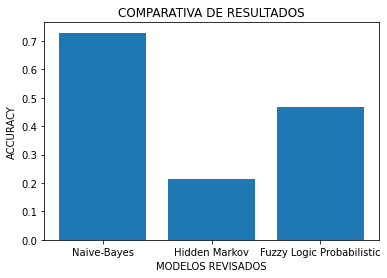

In [90]:
#Se define los modelos que se van a comparar
eje_x = ['Naive-Bayes', 'Hidden Markov', 'Fuzzy Logic Probabilistic']
 
## Declaramos valores para el eje y
eje_y = [acc_score_naive,acc_score_markov,acc_score_fuzzy]
# Creamos Gráfica
plt.bar(eje_x, eje_y)
## Eje y
plt.ylabel('ACCURACY')
## Eje x
plt.xlabel('MODELOS REVISADOS')
## Título
plt.title('COMPARATIVA DE RESULTADOS')
## Se muestra la Gráfica
plt.show()

# Gracias :)